* **Problem Statement:**
    Your task is to create a deep neural network(DNN) using PyTorch for Seeds classification. Design a network architecture and train it to classify the datasets.

* **Requirements:**
    1. Design a PyTorch DNN.
    2. Define an appropriate loss function and optimizer for training the network.
    3. Split the dataset for training and testing.
    4. Train the network using the training dataset and validate it on the validation dataset.
    5. Evaluate the trained model on the test dataset and report the accuracy.

In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#### Step 1: Load the seeds dataset

In [2]:
data = pd.read_csv('seeds.csv')
data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
column_names = data.columns
type(column_names)

pandas.core.indexes.base.Index

<Axes: title={'center': 'Distribution of Target Variable'}, ylabel='species'>

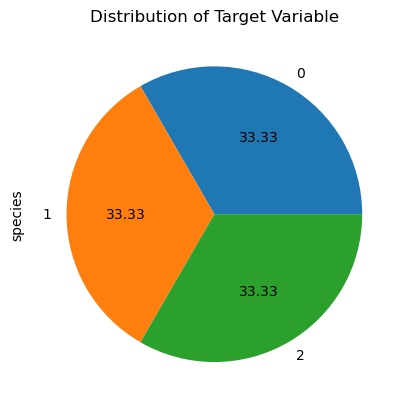

In [4]:
data.species.value_counts().plot.pie(autopct='%.2f',
                                    labels=[0, 1, 2],
                                    title='Distribution of Target Variable')

#### Step 2: Prepare the data

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
X[:5]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ]])

In [7]:
y[:130]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

#### Step 3: Standardize the features

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Step 4: Convert to PyTorch Tensors

In [9]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

#### Step 5: Define a custom dataset and create data loaders for training and testing.

In [10]:
class SeedsDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [11]:
dataset = SeedsDataset(X, y)
type(dataset)

__main__.SeedsDataset

In [12]:
# Split dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [13]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

#### Step 6: Design the PyTorch DNN 
##### Define the network architecture

In [14]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = DNN()

**Class Definition:** Define a custom neural network class DNN that inherits from nn.Module, which is the base class for all neural network modules in PyTorch.This class contains the layers and the forward method to define the forward pass.

**Layer Initialization:** the __init__ method, we define the layers of the network. Each layer is an instance of nn.Linear, which applies a linear transformation to the incoming data.

**Input Layer:** The input layer has 7 features (corresponding to the 7 features in the Seeds dataset).

**Hidden Layers:**
1). The first hidden layer has 64 neurons.
2). The second hidden layer has 32 neurons.
3). The third hidden layer has 16 neurons.

**Output Layer:** The output layer has 3 neurons, corresponding to the 3 classes in the target variable.

**Activation Function:** The ReLU (Rectified Linear Unit) activation function is applied after each hidden layer to introduce non-linearity into the model, allowing it to learn complex patterns in the data.

#### Step 7: Define Loss Function and Optimizer

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### Step 8: Train and Validate the Model

In [16]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}')

Epoch 1/50, Loss: 1.0963
Epoch 2/50, Loss: 1.0591
Epoch 3/50, Loss: 1.0019
Epoch 4/50, Loss: 0.8991
Epoch 5/50, Loss: 0.7654
Epoch 6/50, Loss: 0.6419
Epoch 7/50, Loss: 0.5130
Epoch 8/50, Loss: 0.3954
Epoch 9/50, Loss: 0.3031
Epoch 10/50, Loss: 0.2566
Epoch 11/50, Loss: 0.2202
Epoch 12/50, Loss: 0.1994
Epoch 13/50, Loss: 0.1912
Epoch 14/50, Loss: 0.1798
Epoch 15/50, Loss: 0.1657
Epoch 16/50, Loss: 0.1711
Epoch 17/50, Loss: 0.1457
Epoch 18/50, Loss: 0.1431
Epoch 19/50, Loss: 0.1375
Epoch 20/50, Loss: 0.1344
Epoch 21/50, Loss: 0.1274
Epoch 22/50, Loss: 0.1241
Epoch 23/50, Loss: 0.1241
Epoch 24/50, Loss: 0.1190
Epoch 25/50, Loss: 0.1202
Epoch 26/50, Loss: 0.1206
Epoch 27/50, Loss: 0.1085
Epoch 28/50, Loss: 0.0981
Epoch 29/50, Loss: 0.0922
Epoch 30/50, Loss: 0.0905
Epoch 31/50, Loss: 0.0961
Epoch 32/50, Loss: 0.0923
Epoch 33/50, Loss: 0.0862
Epoch 34/50, Loss: 0.0831
Epoch 35/50, Loss: 0.0760
Epoch 36/50, Loss: 0.0832
Epoch 37/50, Loss: 0.0795
Epoch 38/50, Loss: 0.0834
Epoch 39/50, Loss: 0.

#### Step 9: Evaluate the Model
##### Evaluate the model on the test dataset and report the accuracy.

In [17]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8571


#### Summary
* Data Preparation: Load and preprocess the Seeds dataset.
* Dataset and DataLoader: Create a custom dataset and data loaders for training and testing.
* Network Architecture: Define a deep neural network with multiple hidden layers.
* Loss Function and Optimizer: Use cross-entropy loss and Adam optimizer.
* Training: Train the model for a specified number of epochs, monitoring the loss.
* Evaluation: Evaluate the model on the test dataset and report the accuracy.